#**Best Subset Selection**

To perform best selection, we fit separate models for each possible combination of the n predictors and then select the best subset. Code below is for Linear Regression.

Connect Google Drive and load libaries

In [1]:
#@title
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd /gdrive/MyDrive/CSC8635/
## Check that the data_subjects_info.csv is in the current folder location
#@title
## set up the libraries that are needed to run the analysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Mounted at /gdrive
/gdrive
/gdrive/MyDrive/CSC8635


Load data

In [3]:
#@title
#set up for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import sklearn
import tensorflow as tf

import os
#print(os.listdir("A_DeviceMotion_data/A_DeviceMotion_data"))

# Data Folders:
Folders = glob('A_DeviceMotion_data/A_DeviceMotion_data/*_*')
Folders = [s for s in Folders if "csv" not in s]

Df_all_list = []
Exp = 0
# Segment the data to 400 samples frames , each one will be a different experiment
Segment_Size = 400

# Activity types dict:
activity_codes = {'dws':1,'jog':2,'sit':3,'std':4,'ups':5,'wlk':6}        
activity_types = list(activity_codes.keys())

# Load All data:
for j  in Folders:
  Csv = glob(j + '/*' )
  for i in Csv:
    df = pd.read_csv(i)
    df['Activity'] = activity_codes[j[40:43]]
    df['Sub_Num'] = i[len(j)+5:-4]
    df['Exp_num'] = 1
    ExpNum = np.zeros((df.shape[0])) 
    for i in range(0,df.shape[0]-Segment_Size,Segment_Size):
      ExpNum[range(i,i+Segment_Size)] = i/Segment_Size +Exp*100 
    df['Exp_num'] = ExpNum
    #Df_all = pd.concat([Df_all,df])
    Df_all_list.append(df)
    Exp += 1        
Df_all = pd.concat(Df_all_list,axis=0)  
print(f'The data has been loaded.')
print(f'The dimensions of the complete dataset are {Df_all.shape}.')
print(f'The 16 column headers are {Df_all.columns}.')
#check unique values for the participants
#np.unique(Df_all['Sub_Num'])

The data has been loaded.
The dimensions of the complete dataset are (1412865, 16).
The 16 column headers are Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'Activity', 'Sub_Num',
       'Exp_num'],
      dtype='object').


##Best Subset Selection (Linear Regression Model) for the whole dataset to determine Activity (25 minutes)

In [4]:
#@title
#code based on https://xavierbourretsicotte.github.io/subset_selection.html

import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#@title
#Best Subset Selection

#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = Df_all.Activity
X = Df_all.drop(['Exp_num','Unnamed: 0','Activity','Sub_Num'], axis = 1)
   
k = 12
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 12 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 12 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  from ipykernel import kernelapp as app


Loop...:   0%|          | 0/12 [00:00<?, ?it/s]

Calculate RSS and R2 for 6 main features of 12 

In [17]:
#@title
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(6))
display(df_max.head(6))

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
4,1,3.398349e+06,0.050584,"(gravity.y,)",3.398349e+06,0.050584
56,2,3.365852e+06,0.059663,"(gravity.y, userAcceleration.z)",3.365852e+06,0.059663
256,3,3.345289e+06,0.065407,"(gravity.y, rotationRate.y, userAcceleration.z)",3.345289e+06,0.065407
421,4,3.339784e+06,0.066945,"(attitude.roll, gravity.y, rotationRate.y, use...",3.339784e+06,0.066945
1011,5,3.328043e+06,0.070226,"(attitude.roll, gravity.x, gravity.y, rotation...",3.328043e+06,0.070226
1929,6,3.322787e+06,0.071694,"(attitude.roll, gravity.x, gravity.y, gravity....",3.322787e+06,0.071694


,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
4,1,3.398349e+06,0.050584,"(gravity.y,)",3.398349e+06,0.050584
56,2,3.365852e+06,0.059663,"(gravity.y, userAcceleration.z)",3.365852e+06,0.059663
256,3,3.345289e+06,0.065407,"(gravity.y, rotationRate.y, userAcceleration.z)",3.345289e+06,0.065407
421,4,3.339784e+06,0.066945,"(attitude.roll, gravity.y, rotationRate.y, use...",3.339784e+06,0.066945
1011,5,3.328043e+06,0.070226,"(attitude.roll, gravity.x, gravity.y, rotation...",3.328043e+06,0.070226
1929,6,3.322787e+06,0.071694,"(attitude.roll, gravity.x, gravity.y, gravity....",3.322787e+06,0.071694


Key features

In [7]:
#@title
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,3.570518e+06,0.002484,"(attitude.roll,)",3.398349e+06,0.050584
1,1,3.414397e+06,0.046100,"(attitude.pitch,)",3.398349e+06,0.050584
2,1,3.576789e+06,0.000732,"(attitude.yaw,)",3.398349e+06,0.050584
3,1,3.574680e+06,0.001321,"(gravity.x,)",3.398349e+06,0.050584
4,1,3.398349e+06,0.050584,"(gravity.y,)",3.398349e+06,0.050584


Display the Best Subset Selection results

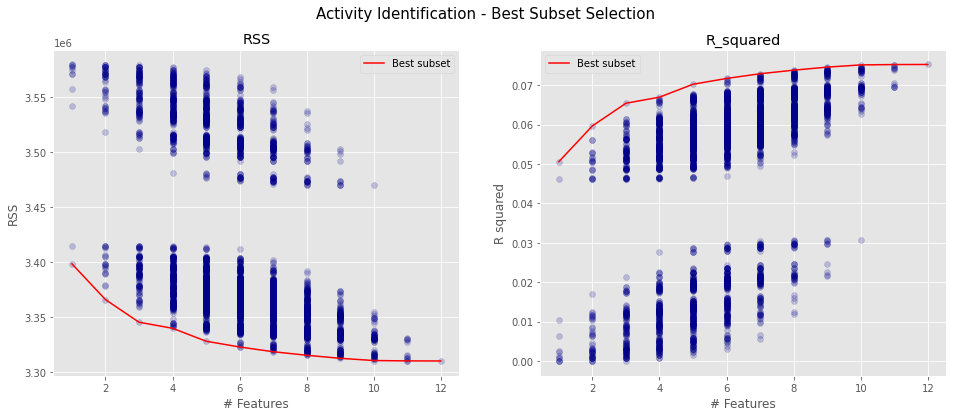

In [10]:
#@title
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared')
ax.legend()
plt.suptitle(f'Activity Identification - Best Subset Selection', fontsize=15)
plt.show()

For computational reasons, the best subset cannot be applied for any large n due to the 2n complexity. Let's try Forward Stepwise which begins with a model containing no predictors, and then adds predictors to the model, one at the time. At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

In [11]:
#@title
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

Run forward stepwise subset selection and display top 4 features

In [12]:
#@title
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['gravity.y'], 3398349),
 (2, ['gravity.y', 'userAcceleration.z'], 3365852),
 (3, ['gravity.y', 'userAcceleration.z', 'rotationRate.y'], 3345289),
 (4,
  ['gravity.y', 'userAcceleration.z', 'rotationRate.y', 'attitude.roll'],
  3339784)]

In [13]:
#@title
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

Display table of best subset selected features

In [14]:
#@title
#Initializing useful variables
m = len(Y)
p = 12
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[gravity.y],3.398349e+06,0.050584,1,2.405293,1.026660,1.026669,0.050583
2,"[gravity.y, userAcceleration.z]",3.365852e+06,0.059663,2,2.382295,1.016844,1.016861,0.059661
3,"[gravity.y, userAcceleration.z, rotationRate.y]",3.345289e+06,0.065407,3,2.367745,1.010633,1.010659,0.065405
4,"[gravity.y, userAcceleration.z, rotationRate.y...",3.339784e+06,0.066945,4,2.363851,1.008972,1.009006,0.066943
5,"[gravity.y, userAcceleration.z, rotationRate.y...",3.328043e+06,0.070226,5,2.355544,1.005426,1.005469,0.070222
6,"[gravity.y, userAcceleration.z, rotationRate.y...",3.322787e+06,0.071694,6,2.351828,1.003839,1.003891,0.071690
7,"[gravity.y, userAcceleration.z, rotationRate.y...",3.318493e+06,0.072894,7,2.348792,1.002544,1.002604,0.072889
8,"[gravity.y, userAcceleration.z, rotationRate.y...",3.315266e+06,0.073795,8,2.346511,1.001570,1.001639,0.073790
9,"[gravity.y, userAcceleration.z, rotationRate.y...",3.312497e+06,0.074569,9,2.344555,1.000735,1.000813,0.074563
10,"[gravity.y, userAcceleration.z, rotationRate.y...",3.310481e+06,0.075132,10,2.343131,1.000127,1.000213,0.075125


The R2 values are very low. R2 ranges from 0 to 1. For example, if the R-squared is 0.9, it indicates that 90% of the variation in the output variables are explained by the input variables. Generally speaking, a higher R-squared indicates a better fit for the model.

Calculate Adjusted R Squared

In [15]:
#@title
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.07523727427585192

This value is very low too. The adjusted R-squared is a modified version of R-squared that accounts for predictors that are not significant in a regression model. In other words, the adjusted R-squared shows whether adding additional predictors improve a regression model or not. In this case all the variables are needed to maximise accuracy but a Linear Regression Model is not a good fit for the dataset.

Display Best Subset Selection Alternative Models - C_p, AIC, BIC, Adjusted R2

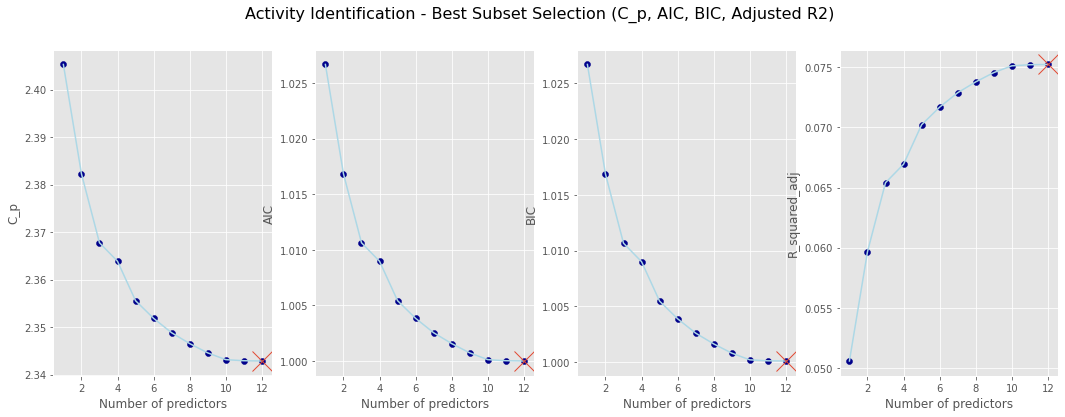

In [16]:
#@title
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Activity Identification - Best Subset Selection (C_p, AIC, BIC, Adjusted R2)', fontsize = 16)
plt.show()

When using a Linear Regression Model, all variables would be needed for accuracy of determing Activity Type. Best subset selection won't help to reduce dimensionality of the dataset. All data is needed.

##Best Subset Selection for Jogging Activity to identify Subject (12 mins to run)

Select Jogging Activity Type only

In [18]:
#@title
Jog = Df_all.loc[(Df_all['Activity'] >= 2)
                     & (Df_all['Activity'] < 3)]

In [19]:
#@title
#Initialization variables
Y = Jog.Sub_Num
X = Jog.drop(['Exp_num','Unnamed: 0','Activity','Sub_Num'], axis = 1)
   
k = 12
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 12 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 12 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # This is added back by InteractiveShellApp.init_path()


Loop...:   0%|          | 0/12 [00:00<?, ?it/s]

Show Top 6 features with greatest variation that support model accuracy

In [21]:
#@title
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(6))
display(df_max.head(6))


Top 6 features


,numb_features,RSS,R_squared,features
4,1,6.517496e+06,0.016169,"(gravity.y,)"
50,2,6.481423e+06,0.021615,"(gravity.y, gravity.z)"
143,3,6.444719e+06,0.027155,"(attitude.pitch, gravity.x, gravity.z)"
464,4,6.405658e+06,0.033052,"(attitude.pitch, attitude.yaw, gravity.x, grav..."
1135,5,6.393779e+06,0.034845,"(attitude.pitch, attitude.yaw, gravity.x, grav..."
2079,6,6.392209e+06,0.035082,"(attitude.pitch, attitude.yaw, gravity.x, grav..."


,numb_features,RSS,R_squared,features
4,1,6.517496e+06,0.016169,"(gravity.y,)"
50,2,6.481423e+06,0.021615,"(gravity.y, gravity.z)"
143,3,6.444719e+06,0.027155,"(attitude.pitch, gravity.x, gravity.z)"
464,4,6.405658e+06,0.033052,"(attitude.pitch, attitude.yaw, gravity.x, grav..."
1135,5,6.393779e+06,0.034845,"(attitude.pitch, attitude.yaw, gravity.x, grav..."
2079,6,6.392209e+06,0.035082,"(attitude.pitch, attitude.yaw, gravity.x, grav..."


Lot of similar or equal values (shown below)

In [22]:
#@title
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,6.619239e+06,0.000811,"(attitude.roll,)",6.517496e+06,0.016169
1,1,6.522071e+06,0.015479,"(attitude.pitch,)",6.517496e+06,0.016169
2,1,6.605545e+06,0.002878,"(attitude.yaw,)",6.517496e+06,0.016169
3,1,6.548321e+06,0.011516,"(gravity.x,)",6.517496e+06,0.016169
4,1,6.517496e+06,0.016169,"(gravity.y,)",6.517496e+06,0.016169


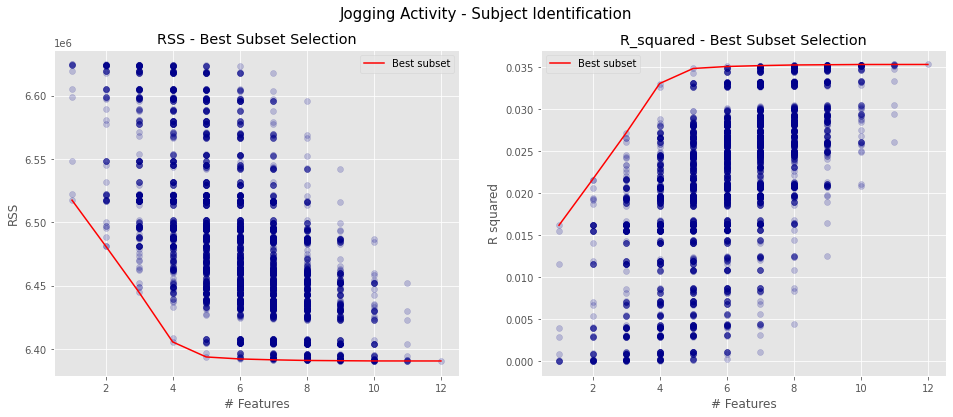

In [23]:
#@title
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best Subset Selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best Subset Selection')
ax.legend()
plt.suptitle(f'Jogging Activity - Subject Identification', fontsize=15)
plt.show()


Forward Stepwise Selection 

In [24]:
#@title
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

Show Top 4 features

In [25]:
#@title
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['gravity.y'], 6517496),
 (2, ['gravity.y', 'gravity.z'], 6481423),
 (3, ['gravity.y', 'gravity.z', 'attitude.yaw'], 6449020),
 (4, ['gravity.y', 'gravity.z', 'attitude.yaw', 'gravity.x'], 6408374)]

In [26]:
#@title
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [27]:
#@title
#Initializing useful variables
m = len(Y)
p = 12
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[gravity.y],6.517496e+06,0.016169,1,48.555041,1.019771,1.019844,0.016162
2,"[gravity.y, gravity.z]",6.481423e+06,0.021615,2,48.287007,1.014142,1.014288,0.021600
3,"[gravity.y, gravity.z, attitude.yaw]",6.449020e+06,0.026506,3,48.046318,1.009087,1.009306,0.026484
4,"[gravity.y, gravity.z, attitude.yaw, gravity.x]",6.408374e+06,0.032642,4,47.744221,1.002742,1.003034,0.032613
5,"[gravity.y, gravity.z, attitude.yaw, gravity.x...",6.396973e+06,0.034363,5,47.659995,1.000973,1.001339,0.034327
6,"[gravity.y, gravity.z, attitude.yaw, gravity.x...",6.393459e+06,0.034893,6,47.634525,1.000438,1.000877,0.034850
7,"[gravity.y, gravity.z, attitude.yaw, gravity.x...",6.391917e+06,0.035126,7,47.623753,1.000212,1.000724,0.035076
8,"[gravity.y, gravity.z, attitude.yaw, gravity.x...",6.391302e+06,0.035219,8,47.619879,1.000131,1.000715,0.035161
9,"[gravity.y, gravity.z, attitude.yaw, gravity.x...",6.390786e+06,0.035297,9,47.616746,1.000065,1.000722,0.035232
10,"[gravity.y, gravity.z, attitude.yaw, gravity.x...",6.390640e+06,0.035319,10,47.616362,1.000057,1.000787,0.035247


Again R2 is very low

In [28]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.03524688024250666

And Adjusted R2 is half that of the linear regression for all activity types

However the Best Subset Selection does suggest that we could reduce the dataset by a few variables when identifying the subject when the activity type is limited to jogging and a Linear Regression Model is applied. Three models recommend 10 variables and one suggested 8.

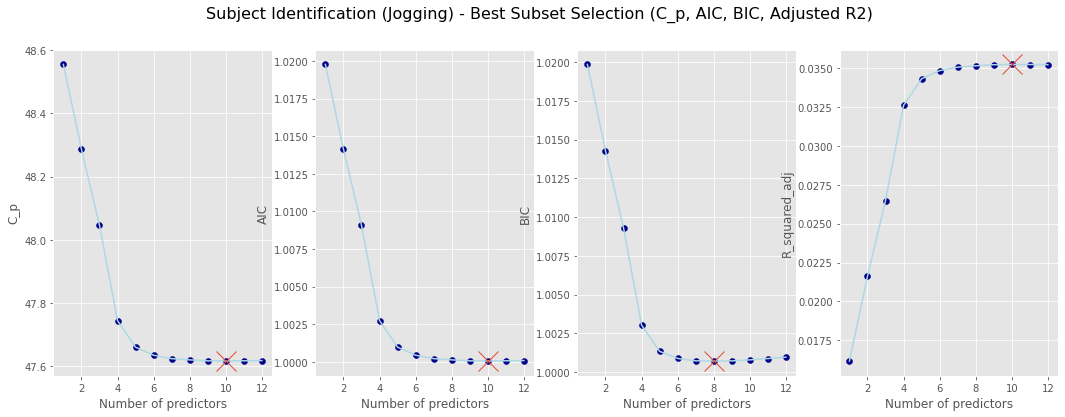

In [31]:
#@title
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subject Identification (Jogging) - Best Subset Selection (C_p, AIC, BIC, Adjusted R2)', fontsize = 16)
plt.show()

**Change code below, select activity number to see Best Subset Selection**

Downstairs = 1

Jogging = 2 (12 mins)

Sitting = 3

Standing = 4 (approx. 16 mins to run)

Upstairs = 5

Walking = 6



In [32]:
Standing = Df_all.loc[(Df_all['Activity'] >= 4)
                     & (Df_all['Activity'] < 5)]

In [33]:
#Initialization variables
Y = Standing.Sub_Num
X = Standing.drop(['Exp_num','Unnamed: 0','Activity','Sub_Num'], axis = 1)
   
k = 12
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 12 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 12 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # Remove the CWD from sys.path while we load stuff.


Loop...:   0%|          | 0/12 [00:00<?, ?it/s]

Calculate R2

In [34]:
#@title
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)

Display results

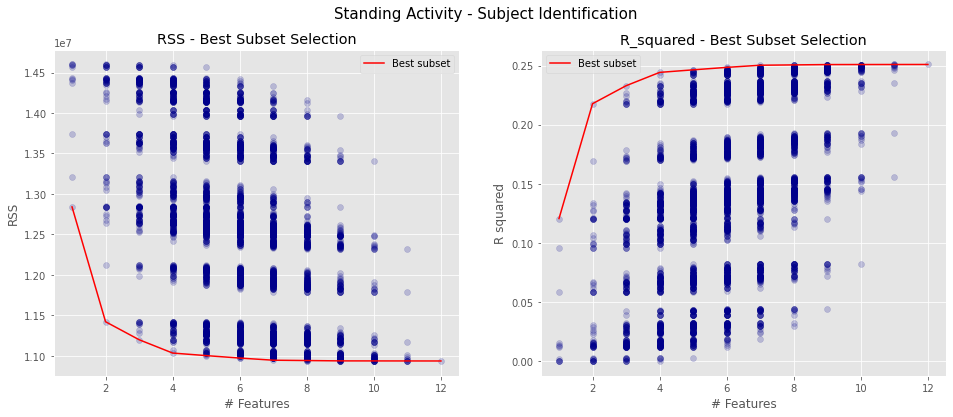

In [35]:
#@title
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best Subset Selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best Subset Selection')
ax.legend()
plt.suptitle(f'Standing Activity - Subject Identification', fontsize=15)
plt.show()


Calculate forward step

In [36]:
#@title
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

Top four features accounting for largest variation

In [37]:
#@title
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['gravity.x'], 12839861),
 (2, ['gravity.x', 'gravity.z'], 11420600),
 (3, ['gravity.x', 'gravity.z', 'attitude.yaw'], 11198412),
 (4, ['gravity.x', 'gravity.z', 'attitude.yaw', 'attitude.pitch'], 11033569)]

In [38]:
#@title
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [39]:
#@title
#Initializing useful variables
m = len(Y)
p = 12
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[gravity.x],1.283986e+07,0.120570,1,41.902094,1.174083,1.174118,0.120567
2,"[gravity.x, gravity.z]",1.142060e+07,0.217779,2,37.270680,1.044312,1.044382,0.217774
3,"[gravity.x, gravity.z, attitude.yaw]",1.119841e+07,0.232997,3,36.545819,1.024002,1.024106,0.232989
4,"[gravity.x, gravity.z, attitude.yaw, attitude....",1.103357e+07,0.244287,4,36.008101,1.008935,1.009074,0.244277
5,"[gravity.x, gravity.z, attitude.yaw, attitude....",1.100198e+07,0.246451,5,35.905233,1.006053,1.006227,0.246439
6,"[gravity.x, gravity.z, attitude.yaw, attitude....",1.097177e+07,0.248520,6,35.806876,1.003297,1.003505,0.248506
7,"[gravity.x, gravity.z, attitude.yaw, attitude....",1.094513e+07,0.250344,7,35.720201,1.000869,1.001111,0.250327
8,"[gravity.x, gravity.z, attitude.yaw, attitude....",1.094101e+07,0.250627,8,35.706983,1.000498,1.000776,0.250607
9,"[gravity.x, gravity.z, attitude.yaw, attitude....",1.093684e+07,0.250913,9,35.693584,1.000123,1.000435,0.250891
10,"[gravity.x, gravity.z, attitude.yaw, attitude....",1.093635e+07,0.250946,10,35.692233,1.000085,1.000432,0.250921


In [40]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.2509630882311038

Adjusted R2 even lower!!

Display for completeness

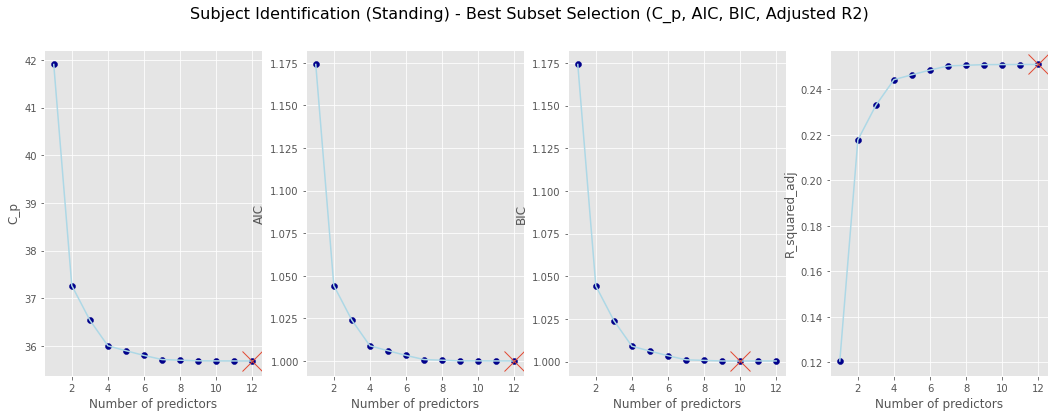

In [41]:
#@title
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)
plt.suptitle('Subject Identification (Standing) - Best Subset Selection (C_p, AIC, BIC, Adjusted R2)', fontsize = 16)
plt.show()

##Conclusion

Linear Regression really isn't a good fit for this dataset and Best Subset Selection doesn't allow dimension reduction unfortunately.